# COVID-19 VISUALISATION AND REGRESSION FOR INDIA

In [288]:
import matplotlib as plt
import matplotlib.pyplot as pt
import csv
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import scipy.stats as sp
import plotly.express as px
from statsmodels.tsa.ar_model import AR


In [289]:
#read data 
data= pd.read_csv('covid19-in-india/AgeGroupDetails.csv')

In [290]:
data
#data till 9 april

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


## VISUALISATION

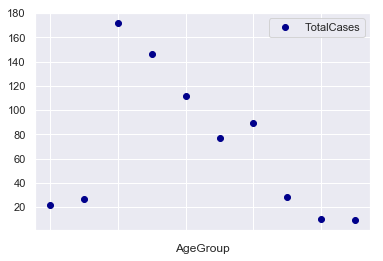

In [291]:
data.plot(x='AgeGroup', y='TotalCases', style='o',c='DarkBlue')
#plot scatter plot of age groups vs no of cases

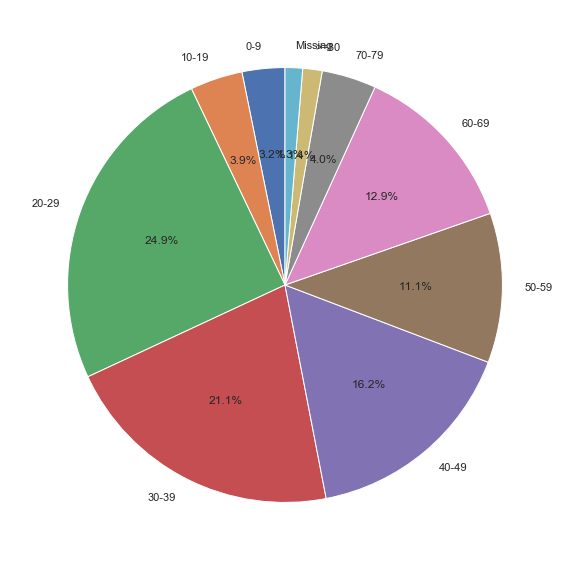

In [292]:
#pie chart of age group data 
ages=data['AgeGroup']
cases= data['TotalCases']
pt.pie(cases,labels=ages,startangle=90, autopct='%.1f%%')
fig = pt.gcf()
fig.set_size_inches(10,10)
pt.show()


In [293]:
data1= pd.read_csv('covid-2/statewise.csv')
#as of 9 april 2020
data1=pd.DataFrame(data1)
data1.sort_values(by=['Total Confirmed cases'], inplace=True, ascending= False)
data1

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-04-09,Maharashtra,0,0,117,19.7515,75.7139,72,1135
1,2020-04-09,Tamil Nadu,0,0,21,11.1271,78.6569,8,738
2,2020-04-09,Delhi,0,0,21,28.7041,77.1025,9,669
3,2020-04-09,Telengana,0,0,35,18.1124,79.0193,7,427
4,2020-04-09,Rajasthan,0,0,21,27.0238,74.2179,3,381
5,2020-04-09,Uttar Pradesh,0,0,27,26.8467,80.9462,4,361
6,2020-04-09,Andhra Pradesh,0,0,6,15.9129,79.7400,4,348
7,2020-04-09,Kerala,0,0,83,10.8505,76.2711,2,345
8,2020-04-09,Madhya Pradesh,0,0,0,22.9734,78.6569,13,229
9,2020-04-09,Karnataka,0,0,28,15.3173,75.7139,5,181


In [294]:
#statewise cases as of 9 april 2020
fig = px.bar(data1, x="Total Confirmed cases", y="Name of State / UT",  title='Total Confirmed cases',
             orientation='h', text='Total Confirmed cases', height=len(data1)*25,
             color_discrete_sequence = px.colors.qualitative.Vivid)
fig.show()

In [295]:
#plot of daily new cases across India
data2= pd.read_csv('covid-2/complete.csv')
data2

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3
5,2020-02-04,Kerala,3,0,0,10.8505,76.2711,0,3
6,2020-02-05,Kerala,3,0,0,10.8505,76.2711,0,3
7,2020-02-06,Kerala,3,0,0,10.8505,76.2711,0,3
8,2020-02-07,Kerala,3,0,0,10.8505,76.2711,0,3
9,2020-02-08,Kerala,3,0,0,10.8505,76.2711,0,3


In [296]:
data2=data2[['Date','Total Confirmed cases']]

In [297]:
perday = data2.groupby(['Date'])['Total Confirmed cases'].sum().reset_index().sort_values('Total Confirmed cases',ascending = True)
perday['New Daily Cases'] = perday['Total Confirmed cases'].sub(perday['Total Confirmed cases'].shift())
perday['New Daily Cases'].iloc[0] = perday['Total Confirmed cases'].iloc[0]
perday['New Daily Cases'] = perday['New Daily Cases'].astype(int)
# New COVID-19 cases reported daily in India
fig = px.bar(perday, x="Date", y="New Daily Cases", barmode='group',height=500,color = "New Daily Cases",
            color_discrete_sequence = px.colors.sequential.Plasma_r)
fig.update_layout(title_text='New cases reported daily in India',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [298]:
data3= pd.read_csv('covid-2/gender.csv')
df=pd.DataFrame(data3)
df2=pd.DataFrame(df['gender'].value_counts())
df2



,gender
M,1109
F,335


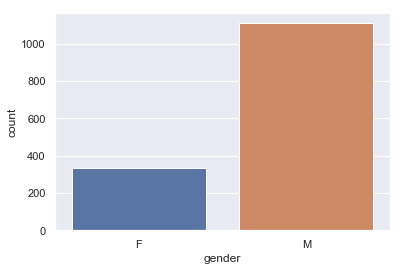

In [299]:
sns.countplot(x ='gender', data = data3) 

## REGRESSION ANALYSIS

In [300]:
#regression analysis
#since growth of COVID-19 is exponential, we do logarithmic curve fitting, rather than linear

In [301]:
regdata=perday[['Date','Total Confirmed cases']]

In [302]:
df=regdata
df.set_index('Date', inplace=False)
x=np.array(pd.to_datetime(df['Date'].dropna()).index.values, dtype=float)
y= np.array(df['Total Confirmed cases'])
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.6613560816380183 
 p =  3.4281878601887664e-10 
 s =  5.502440815923181


In [303]:

regdata['Date']=pd.to_datetime(regdata['Date'])
regdata.set_index('Date', inplace=False)
#pd.plotting.autocorrelation_plot(regdata['Total Confirmed cases'])
#regdata.plot()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Total Confirmed cases
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,2
2020-02-19,3
2020-02-20,3
2020-02-21,3
2020-02-22,3
2020-02-23,3
2020-02-24,3


In [304]:
regdata['stationary']=regdata['Total Confirmed cases'].diff()

In [305]:

X = regdata['stationary'].dropna()
train_data = X[1:len(X)-12]
test_data = X[X[len(X)-12:]]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [306]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 10


In [307]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const             1.099715
L1.stationary     0.272581
L2.stationary     0.732706
L3.stationary    -0.440100
L4.stationary     0.410556
L5.stationary    -0.448332
L6.stationary    -0.311478
L7.stationary     1.845784
L8.stationary    -0.732770
L9.stationary     0.303377
L10.stationary    0.539943
dtype: float64


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



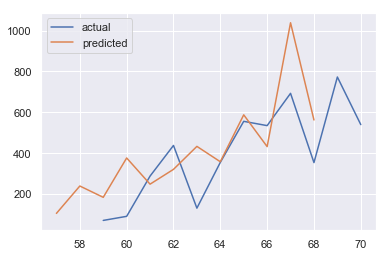

In [308]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [regdata['stationary'].tail(12),
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'})

#plot the two values
compare_df.plot()